## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The data are composed of three time series; temperature, humidity, and luminosity.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

## [데이터 로드 1.]
- loading real-time json file from MongoDB via web

- http://life21c.inje.ac.kr:3030/client_33.html

In [96]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


## [데이터 로드 2.]
- Load the compressed data from github.com

In [97]:
# # Load the compressed data from github.com
# # https://towardsdatascience.com/4-awesome-ways-of-loading-ml-data-in-google-colab-9a5264c61966
# # url_zip = 'https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip'
# !wget https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/iot_data_201005_raw.zip
# !unzip iot_data_201005_raw.zip

In [98]:
# df = pd.read_csv("iot_data_201005_raw.csv", index_col=False)
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


In [99]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


In [100]:
df.tail()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
86019,619de98dc86dbbb61fb821da,2021-11-24 16:28:13.007,22.5,32.8,98,1010.3,35.2,31.0,33.8,0
86020,619de992c86dbbb61fb821dc,2021-11-24 16:28:18.049,22.5,32.8,98,1010.2,35.2,31.0,33.8,0
86021,619de997c86dbbb61fb821de,2021-11-24 16:28:23.091,22.5,33.0,98,1010.3,35.2,31.0,33.8,0
86022,619de99cc86dbbb61fb821e0,2021-11-24 16:28:28.133,22.5,32.9,99,1010.3,35.2,31.0,33.8,0
86023,619de9a1c86dbbb61fb821e2,2021-11-24 16:28:33.176,22.5,32.9,98,1010.3,35.2,31.0,33.8,0


In [101]:
df.shape, type(df)

((86024, 10), pandas.core.frame.DataFrame)

In [102]:
df['date'][:1],df['date'][-1:]

(0   2021-11-19 15:55:08.449
 Name: date, dtype: datetime64[ns], 86023   2021-11-24 16:28:33.176
 Name: date, dtype: datetime64[ns])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86024 entries, 0 to 86023
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          86024 non-null  object        
 1   date         86024 non-null  datetime64[ns]
 2   temperature  86024 non-null  float64       
 3   humidity     86024 non-null  float64       
 4   luminosity   86024 non-null  int64         
 5   pressure     86024 non-null  float64       
 6   r_ratio      35969 non-null  float64       
 7   g_ratio      35969 non-null  float64       
 8   b_ratio      35969 non-null  float64       
 9   __v          86024 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 6.6+ MB


In [104]:
df.describe()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
count,86024.000000,86024.000000,86024.000000,86024.000000,35969.000000,35969.000000,35969.000000,86024.0
mean,23.036292,38.221053,29.621350,1010.933753,33.295910,33.497654,33.167380,0.0
std,0.746279,4.940036,49.621219,3.116085,5.134508,4.148859,3.407019,0.0
min,21.000000,28.600000,0.000000,1002.800000,0.000000,0.000000,0.000000,0.0
25%,22.700000,33.200000,0.000000,1009.300000,33.000000,32.500000,32.900000,0.0
50%,23.200000,39.900000,0.000000,1011.400000,33.300000,32.900000,33.300000,0.0
75%,23.500000,43.000000,42.000000,1013.300000,34.800000,33.300000,34.100000,0.0
max,24.600000,45.700000,319.000000,1015.700000,50.000000,100.000000,100.000000,0.0


In [105]:
# Save iot data in csv file.
# df.to_csv('iot_data_201005_raw.csv')

## Check data
- NaN
- missing value

In [106]:
df.isnull().sum() #/df.shape[0]*100

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        50055
g_ratio        50055
b_ratio        50055
__v                0
dtype: int64

In [107]:
df.isna().sum()

_id                0
date               0
temperature        0
humidity           0
luminosity         0
pressure           0
r_ratio        50055
g_ratio        50055
b_ratio        50055
__v                0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> 33.3 (100/3)

In [108]:
df=df.fillna(33.3)
df.isna().sum()

_id            0
date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
__v            0
dtype: int64

In [109]:
# for whole dataframe
# df = df.replace(np.nan, 33.3)
# df.isnull().sum()

## IoT data were cleaned!

In [110]:
df.head()

,_id,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio,__v
0,61974a4c39d363e662ef4461,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7,0
1,61974a5139d363e662ef4463,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
2,61974a5639d363e662ef4465,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
3,61974a5b39d363e662ef4467,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7,0
4,61974a6039d363e662ef4469,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7,0


## New DataFrame : iot_data
### Dataframe with date and sensor values(temperature, humidity, luminosity, pressure, r, g, b)

In [111]:
#  select columns
cols = ['date', 'temperature', 'humidity', 'luminosity', 'pressure', 'r_ratio', 'g_ratio', 'b_ratio']

In [112]:
# Make iot data
iot_data = df[cols]

In [113]:
iot_data.shape

(86024, 8)

In [114]:
iot_data.head()  # date와 7 개의 신호를 확인.

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [115]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86024 entries, 0 to 86023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         86024 non-null  datetime64[ns]
 1   temperature  86024 non-null  float64       
 2   humidity     86024 non-null  float64       
 3   luminosity   86024 non-null  int64         
 4   pressure     86024 non-null  float64       
 5   r_ratio      86024 non-null  float64       
 6   g_ratio      86024 non-null  float64       
 7   b_ratio      86024 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 5.3 MB


In [116]:
iot_data.isna().sum()

date           0
temperature    0
humidity       0
luminosity     0
pressure       0
r_ratio        0
g_ratio        0
b_ratio        0
dtype: int64

In [117]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33_211123_clean.csv')

## EDA

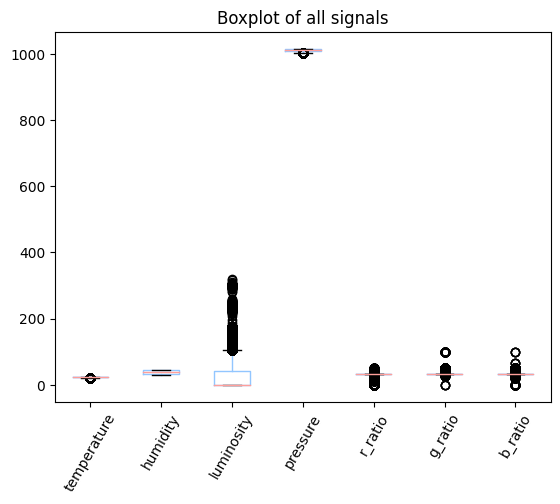

In [118]:
# Plot boxplot
# iot_data[['temperature','humidity','luminosity']].plot.box(title='Boxplot of temperature, humidity, and luminosity')
# iot_data.loc[:,'temperature':'luminosity'].plot.box(title='Boxplot of temperature, humidity, and luminosity')
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

### Plot time series of sensor data

In [119]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


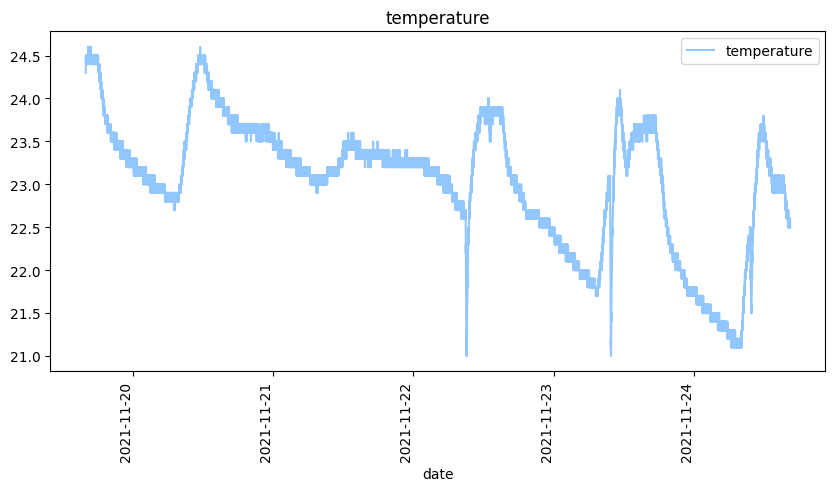

In [120]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=90)
plt.show()

### Set style of graph
- plt.style.use('fivethirtyeight')
- plt.style.use('ggplot')

In [121]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

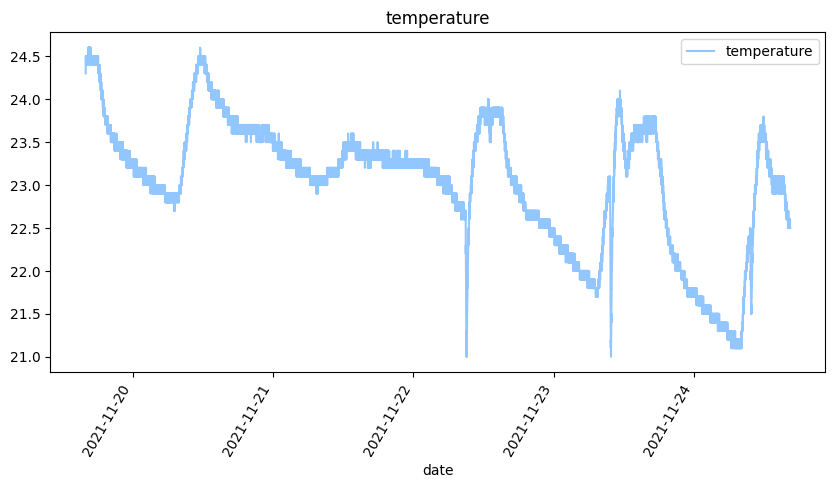

In [122]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('seaborn-pastel') # 'seaborn-pastel', 'fivethirtyeight'
plt.show()

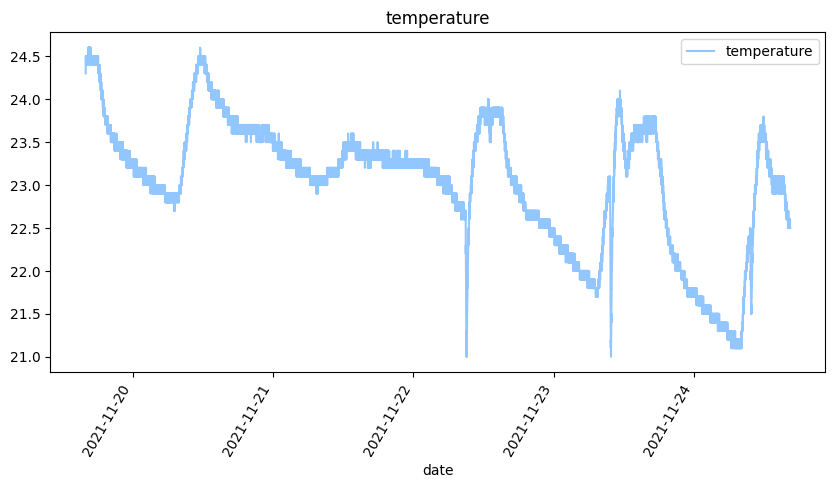

In [123]:
iot_data.plot(x='date', y='temperature', figsize=(10,5), title='temperature')
plt.xticks(rotation=60)
plt.style.use('ggplot')
plt.show()

In [124]:
# restore default style
plt.style.use('default')

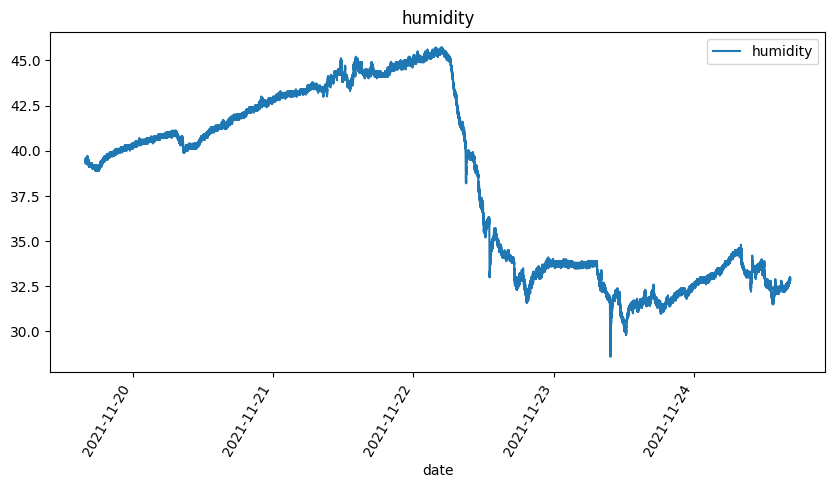

In [125]:
iot_data.plot(x='date', y='humidity', figsize=(10,5), title='humidity')
plt.xticks(rotation=60)
plt.show()

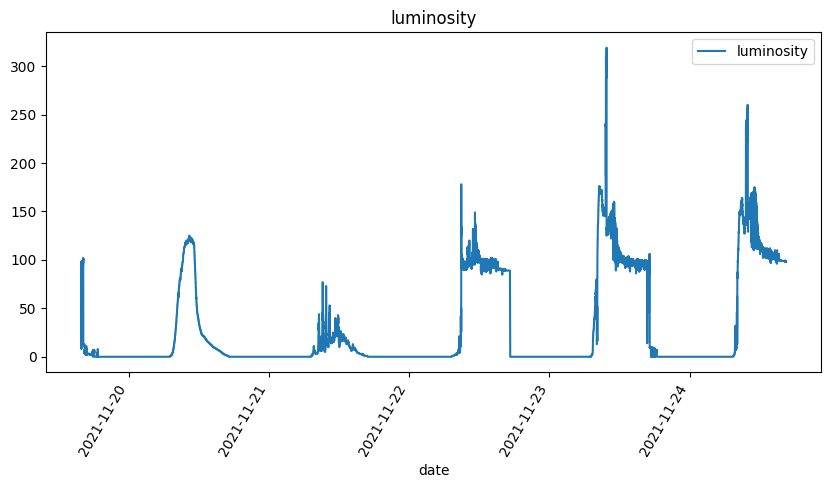

In [126]:
iot_data.plot(x='date', y='luminosity', figsize=(10,5), title='luminosity')
plt.xticks(rotation=60)
plt.show()

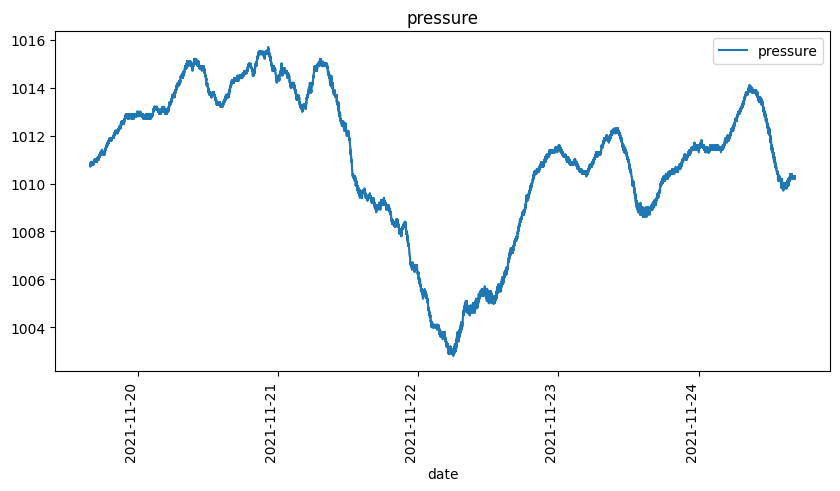

In [127]:
iot_data.plot(x='date', y='pressure', figsize=(10,5), title='pressure')
plt.xticks(rotation=90)
plt.show()

#### 다중그래프 (multiple graphs)

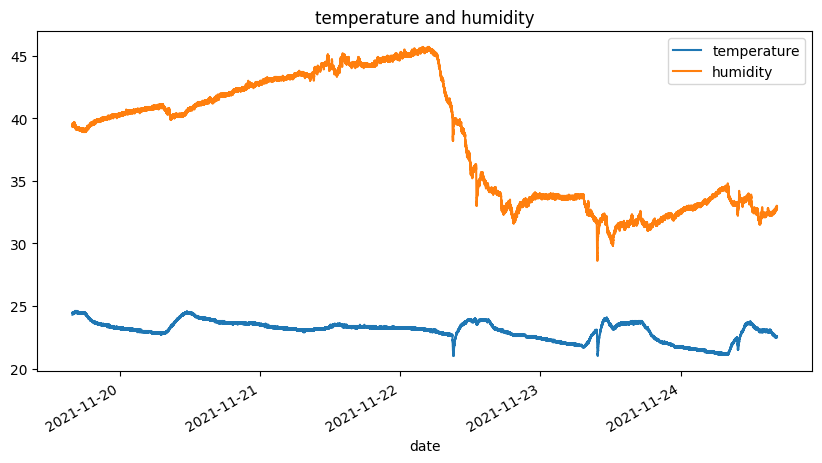

In [128]:
# Plot of ['temperature','humidity']
iot_data.plot(x='date', y=['temperature','humidity'], figsize=(10,5), title='temperature and humidity')

In [175]:
# Plot of ['humidity', 'pressure']
#iot_data.plot(x='date', y=['humidity','pressure'], figsize=(10,5), title='humidity and pressure')
ax = iot_data.plot(x='date', y=['humidity'], figsize=(10,5), title='humidity and pressure')
iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)


KeyError: ignored

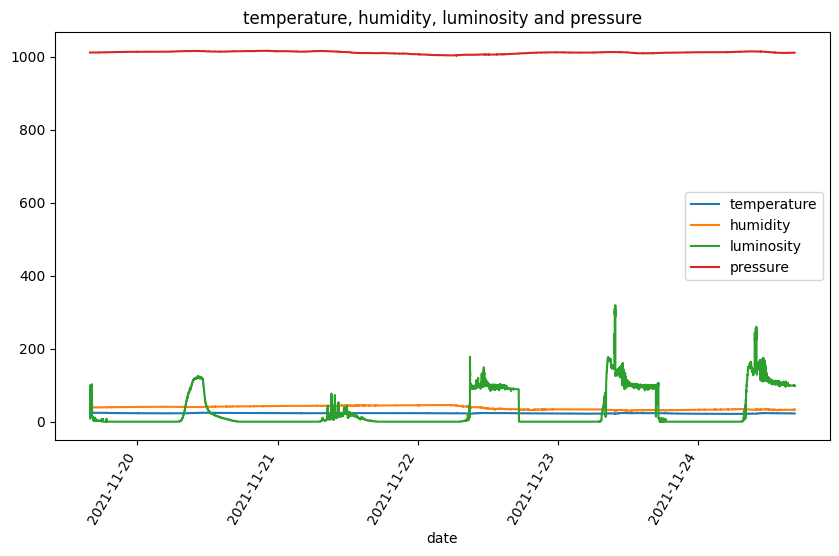

In [130]:
# Plot of ['temperature','humidity','luminosity','pressure']
iot_data.plot(x='date', y=['temperature','humidity','luminosity','pressure'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
plt.xticks(rotation=60)
plt.show()

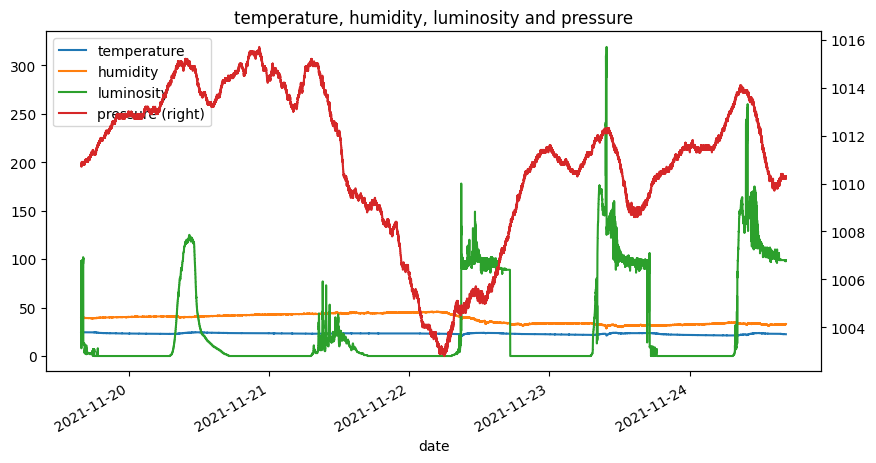

In [131]:
# Plot of ['temperature','humidity','luminosity','pressure']
ax = iot_data.plot(x='date', y=['temperature','humidity','luminosity'], figsize=(10,6), 
             title='temperature, humidity, luminosity and pressure')
iot_data.plot(x='date', y=['pressure'], figsize=(10,5), secondary_y=True, ax=ax)
plt.xticks(rotation=60)
plt.show()

#### Plot the mean of sensor data

In [132]:
iot_data[['temperature','humidity','luminosity']].mean()  

temperature    23.036292
humidity       38.221053
luminosity     29.621350
dtype: float64

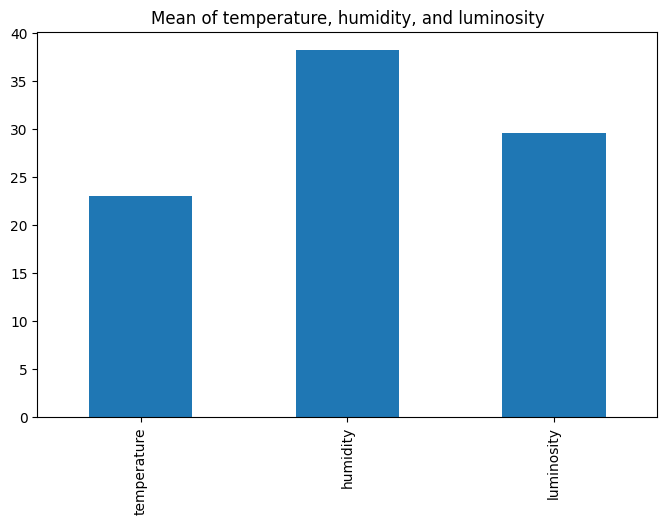

In [133]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

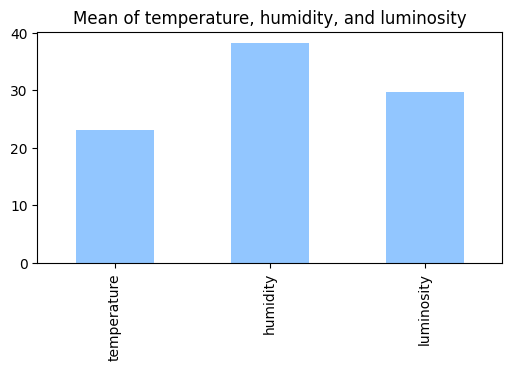

In [134]:
plt.style.use('seaborn-pastel')   # fivethirtyeight, ggplot
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(6,3), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, 1 week

In [135]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


#### Set date as index of timestamp

In [136]:
iot_data.head()

,date,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
0,2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
1,2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2,2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
3,2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
4,2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [137]:
iot_data.set_index('date',inplace=True)

In [138]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [139]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86024 entries, 2021-11-19 15:55:08.449000 to 2021-11-24 16:28:33.176000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  86024 non-null  float64
 1   humidity     86024 non-null  float64
 2   luminosity   86024 non-null  int64  
 3   pressure     86024 non-null  float64
 4   r_ratio      86024 non-null  float64
 5   g_ratio      86024 non-null  float64
 6   b_ratio      86024 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


In [140]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [141]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86024 entries, 2021-11-19 15:55:08.449000 to 2021-11-24 16:28:33.176000
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  86024 non-null  float64
 1   humidity     86024 non-null  float64
 2   luminosity   86024 non-null  int64  
 3   pressure     86024 non-null  float64
 4   r_ratio      86024 non-null  float64
 5   g_ratio      86024 non-null  float64
 6   b_ratio      86024 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.3 MB


In [142]:
iot_data.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:08.449,24.3,39.4,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:13.491,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:18.533,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:23.575,24.4,39.3,98,1010.8,32.5,33.7,33.7
2021-11-19 15:55:28.616,24.4,39.4,98,1010.8,32.5,33.7,33.7


In [143]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:55:00,24.381818,39.327273,89.818182,1010.800000,33.654545,33.518182,32.745455
2021-11-19 15:56:00,24.408333,39.458333,97.750000,1010.791667,32.733333,33.033333,34.225000
2021-11-19 15:57:00,24.416667,39.416667,97.000000,1010.800000,32.366667,33.166667,34.466667
2021-11-19 15:58:00,24.400000,39.327273,97.636364,1010.818182,32.754545,32.972727,34.272727
2021-11-19 15:59:00,24.416667,39.358333,98.000000,1010.850000,32.900000,32.900000,34.200000
...,...,...,...,...,...,...,...
2021-11-24 16:24:00,22.508333,32.816667,98.666667,1010.258333,35.200000,31.000000,33.800000
2021-11-24 16:25:00,22.508333,32.825000,98.416667,1010.225000,35.200000,31.000000,33.800000
2021-11-24 16:26:00,22.508333,32.833333,98.333333,1010.225000,35.200000,31.000000,33.800000


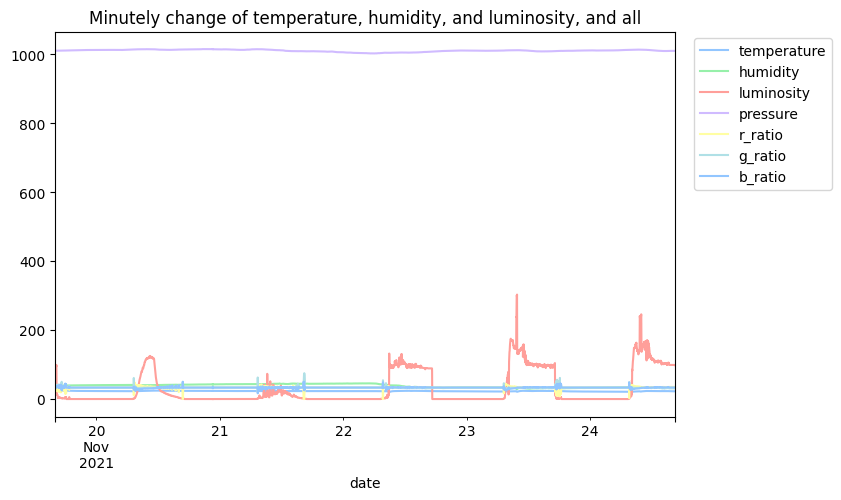

In [144]:
#  Plot mean of the iot data per every minute
iot_data.resample('60S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of temperature, humidity, and luminosity, and all')
plt.legend(bbox_to_anchor=(1.02, 1.0))

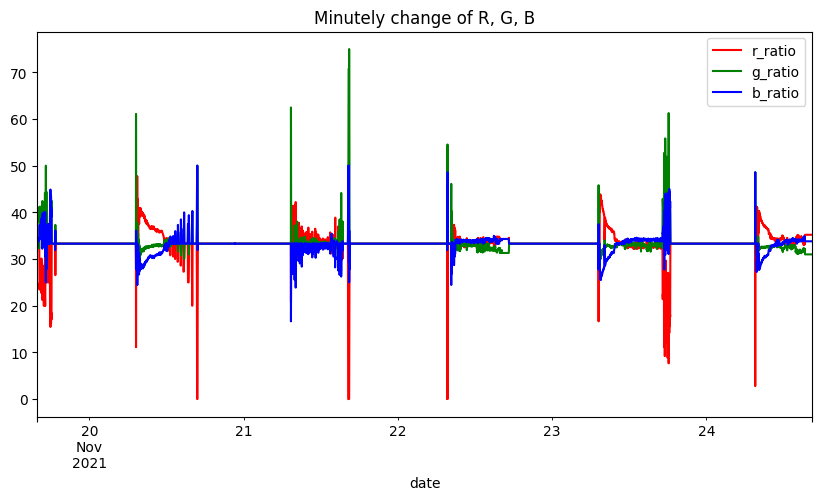

In [145]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('60S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")

In [146]:
3600/5

720.0

In [147]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19 15:00:00,24.405172,39.379310,96.120690,1010.812069,32.870690,33.113793,33.998276
2021-11-19 16:00:00,24.485154,39.319608,28.823529,1010.871008,26.413165,37.708683,35.866106
2021-11-19 17:00:00,24.419916,39.084853,2.712482,1011.141515,27.340813,37.701262,34.902104
2021-11-19 18:00:00,24.169468,39.218627,0.841737,1011.438936,31.048880,34.496359,34.373389
2021-11-19 19:00:00,23.744118,39.625070,0.000000,1011.871709,33.300000,33.300000,33.300000
...,...,...,...,...,...,...,...
2021-11-24 12:00:00,23.389776,32.760644,112.060224,1011.585574,33.618347,32.666387,33.707983
2021-11-24 13:00:00,23.052661,32.187535,108.226891,1010.470028,33.427731,32.507843,34.060784
2021-11-24 14:00:00,23.009384,32.305322,102.306723,1009.945098,34.527451,31.555742,33.911485


In [148]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2021-11-19 15:00:00 to 2021-11-24 16:00:00
Freq: H
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  122 non-null    float64
 1   humidity     122 non-null    float64
 2   luminosity   122 non-null    float64
 3   pressure     122 non-null    float64
 4   r_ratio      122 non-null    float64
 5   g_ratio      122 non-null    float64
 6   b_ratio      122 non-null    float64
dtypes: float64(7)
memory usage: 7.6 KB


((122, 7), None)

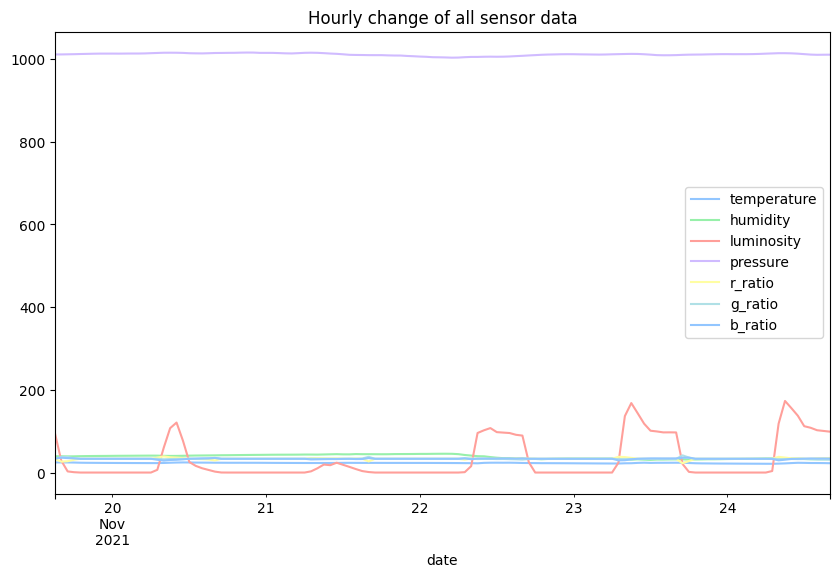

In [149]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), 
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

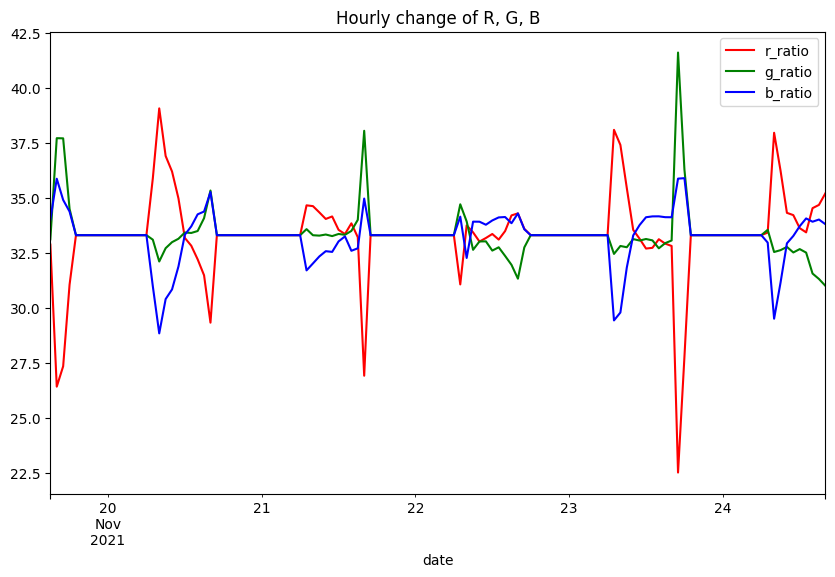

In [150]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of R, G, B')

## [도전하기]  하루 24 시간 동안의 R,G,B 변화 그래프를 그려보시오.

In [151]:
# Estimate the mean of iot data for every day
iot_data.resample('D').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.633695,32.354857,45.958589,1010.697483,32.989417,33.606729,33.336937
2021-11-24,22.127584,33.142698,64.226114,1011.936977,34.124949,32.767078,33.058637


In [152]:
iot_data.resample('D').mean().shape, iot_data.resample('D').mean().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-11-19 to 2021-11-24
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  6 non-null      float64
 1   humidity     6 non-null      float64
 2   luminosity   6 non-null      float64
 3   pressure     6 non-null      float64
 4   r_ratio      6 non-null      float64
 5   g_ratio      6 non-null      float64
 6   b_ratio      6 non-null      float64
dtypes: float64(7)
memory usage: 384.0 bytes


((6, 7), None)

In [153]:
iot_data.resample('D').mean().head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.633695,32.354857,45.958589,1010.697483,32.989417,33.606729,33.336937


In [154]:
iot_data_day=iot_data.resample('D').mean()
iot_data_day.head()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-19,23.813466,39.668128,4.972270,1011.953969,31.428544,34.535581,33.955355
2021-11-20,23.537238,41.197399,18.032679,1014.112089,33.675944,33.330855,32.916743
2021-11-21,23.265260,43.946768,4.969522,1011.407596,33.284773,33.547837,33.078455
2021-11-22,23.071767,38.387348,34.049020,1006.491206,33.305480,33.079727,33.533765
2021-11-23,22.633695,32.354857,45.958589,1010.697483,32.989417,33.606729,33.336937


In [155]:
iot_data_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-11-19 to 2021-11-24
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  6 non-null      float64
 1   humidity     6 non-null      float64
 2   luminosity   6 non-null      float64
 3   pressure     6 non-null      float64
 4   r_ratio      6 non-null      float64
 5   g_ratio      6 non-null      float64
 6   b_ratio      6 non-null      float64
dtypes: float64(7)
memory usage: 384.0 bytes


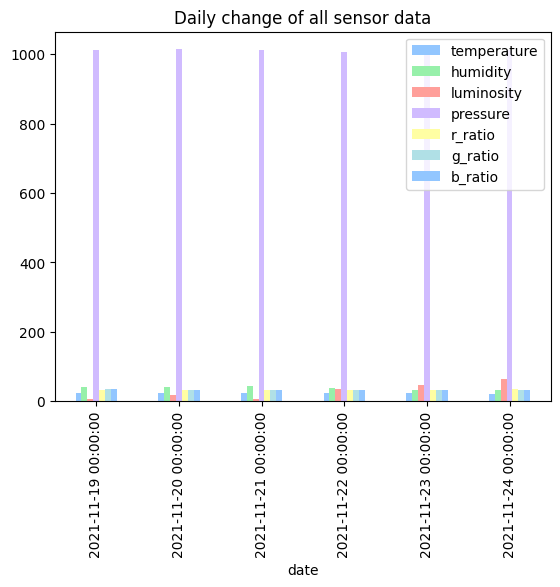

In [156]:
#  Plot mean of the iot data per every day
iot_data.resample('D').mean().plot(kind='bar', #marker='o', ms=6, figsize=(12,6), 
                                   title='Daily change of all sensor data')

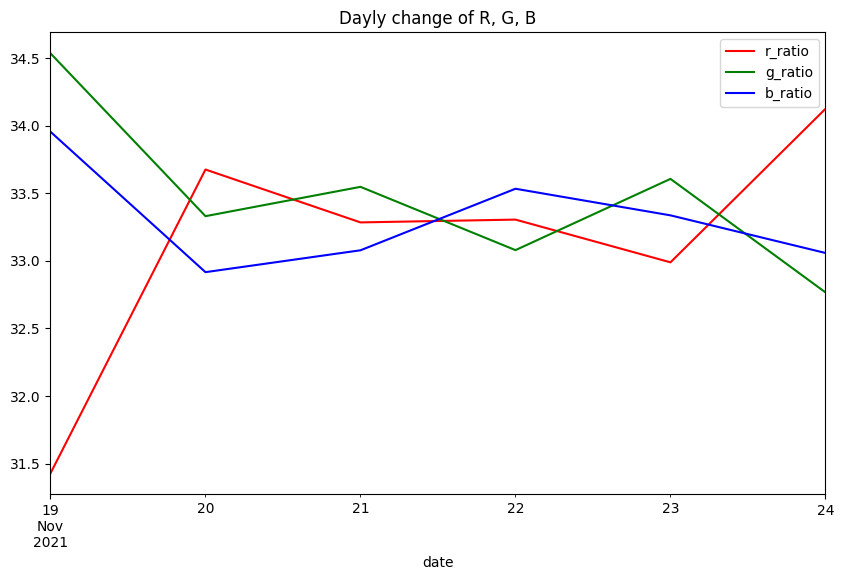

In [157]:
#  Plot mean of the iot data per every day
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean().plot(figsize=(10,6), 
                                    color = ['r','g','b'], #marker='o', ms=6, 
                                    title='Dayly change of R, G, B')

## 위의 그래프를 파이 그래프로 그려보시오.

In [158]:
#  Plot mean of the iot data per every day
# df.plot.pie(subplots=True, figsize=(6, 3))
iot_rgb = iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('D').mean()
iot_rgb.head()


,r_ratio,g_ratio,b_ratio
date,,,
2021-11-19,31.428544,34.535581,33.955355
2021-11-20,33.675944,33.330855,32.916743
2021-11-21,33.284773,33.547837,33.078455
2021-11-22,33.305480,33.079727,33.533765
2021-11-23,32.989417,33.606729,33.336937


In [159]:
iot_rgb.iloc[0],iot_rgb.iloc[1]

(r_ratio    31.428544
 g_ratio    34.535581
 b_ratio    33.955355
 Name: 2021-11-19 00:00:00, dtype: float64, r_ratio    33.675944
 g_ratio    33.330855
 b_ratio    32.916743
 Name: 2021-11-20 00:00:00, dtype: float64)

In [160]:
iot_rgb.index, len(iot_rgb.index)

(DatetimeIndex(['2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
                '2021-11-23', '2021-11-24'],
               dtype='datetime64[ns]', name='date', freq='D'), 6)

In [161]:
# Convert timestamp to date string
iot_rgb.index[0].strftime('%Y-%m-%d')

'2021-11-19'

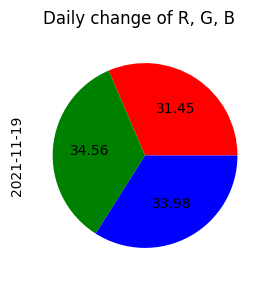

In [162]:
iot_rgb.iloc[0].plot.pie(subplots=True, figsize=(5,3), 
                         colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f', 
                         title='Daily change of R, G, B')
plt.ylabel(iot_rgb.index[0].strftime('%Y-%m-%d'))
plt.show()

## Weekly graph

In [163]:
# Estimate the mean of iot data for every week
iot_data.resample('W').mean()

,temperature,humidity,luminosity,pressure,r_ratio,g_ratio,b_ratio
date,,,,,,,
2021-11-21,23.460635,42.153941,10.555958,1012.642894,33.184304,33.597523,33.135787
2021-11-28,22.667439,34.802455,46.193629,1009.448111,33.397371,33.195865,33.339087


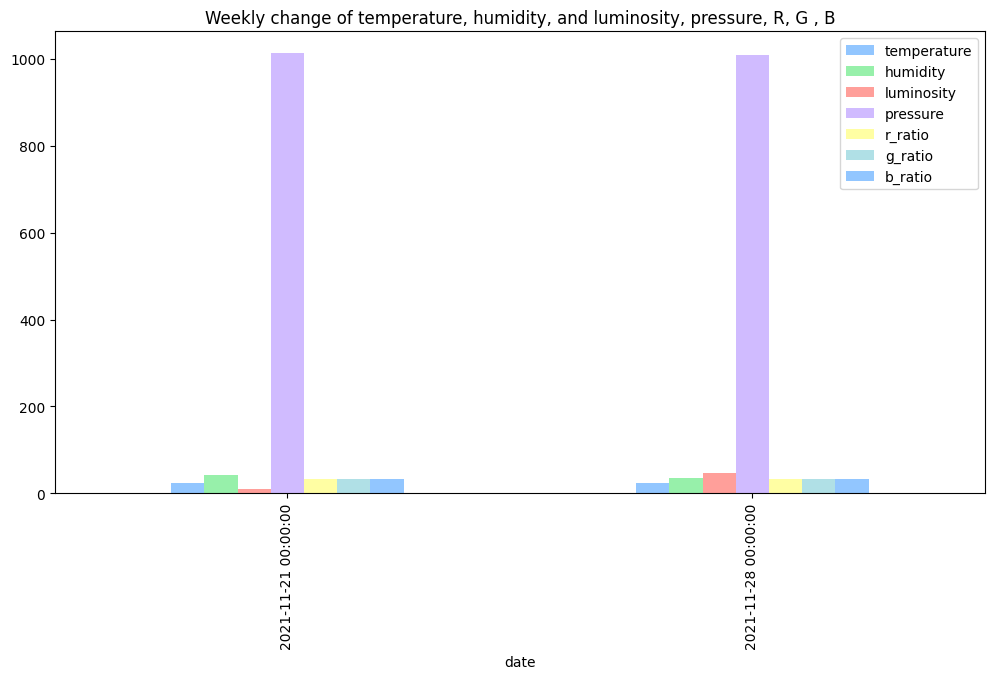

In [164]:
#  Plot mean of the iot data per every week
iot_data.resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature, humidity, and luminosity, pressure, R, G , B')

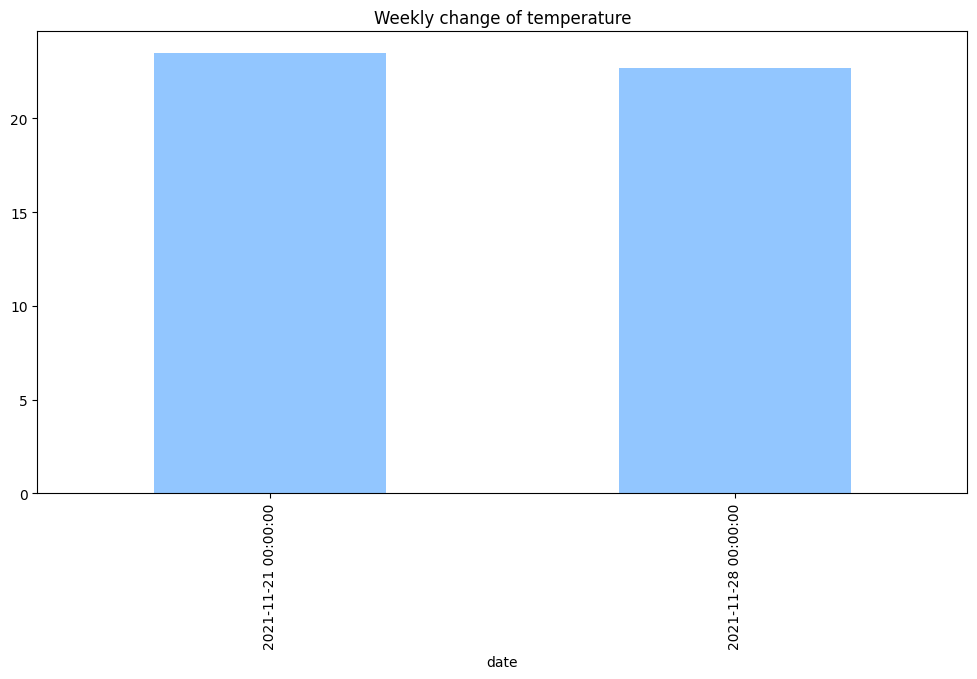

In [165]:
#  Plot mean of the iot data per every week
iot_data['temperature'].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature')

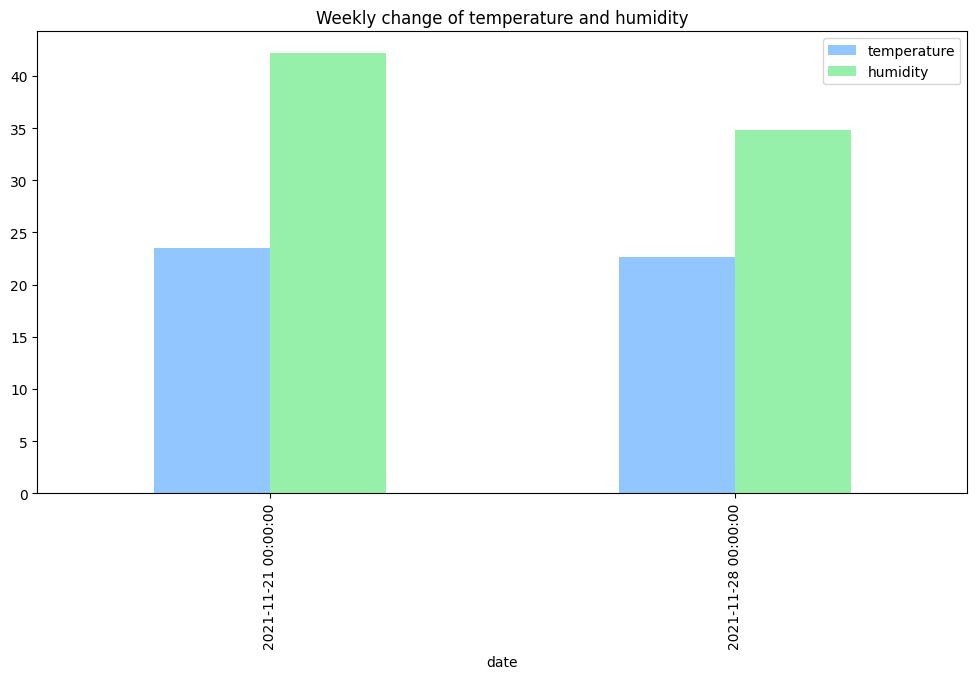

In [166]:
#  Plot mean of the iot data per every week
iot_data[['temperature','humidity']].resample('W').mean().plot(kind='bar', #marker='o', ms=10, 
                                   figsize=(12,6), 
                                   title='Weekly change of temperature and humidity')

# [도전] 다중 파이 그래프

### 다중 파이 그래프
- https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [167]:
iot_rgb.shape,iot_rgb.index.size

((6, 3), 6)

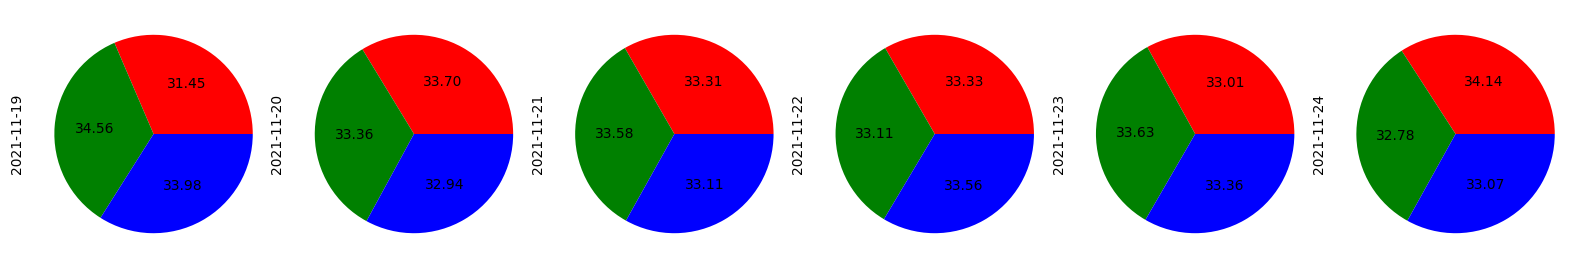

In [168]:
fig, axs = plt.subplots(nrows=1, ncols=iot_rgb.index.size, figsize=(20,5))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

for row in range(iot_rgb.index.size):
    fig.add_subplot(axs[row] )
    plt.pie(iot_rgb.iloc[row],
            colors = ['red', 'green', 'blue'], labeldistance=None, 
                         autopct='%.2f')  #, labels=df.columns)
    plt.ylabel(iot_rgb.index[row].strftime('%Y-%m-%d'))
    # plt.axis('off')

### axes array 코드 참조
```
for row in ax:
    for col in row:
        col.plot(x, y)
```

In [169]:
iot_rgb.index.size

6

In [170]:
# fig, axs = plt.subplots(nrows=(iot_rgb.index.size-1)//7+1, ncols=7, figsize=(16,16))
# # axs.set_axis_off()

# fig.subplots_adjust(hspace=0.5, wspace=0.05)
# idx=0
# for row in axs:
#     # fig.add_subplot(axs[row] )
#     # fig.add_subplot(5, 7, row+1)
#     # ax = axs[row]
#     for col in row:
#         col.pie(iot_rgb.iloc[idx],
#             colors = ['red', 'green', 'blue'], labeldistance=None, 
#                          autopct='%.2f')  #, labels=df.columns)
        
#         col.set_ylabel(iot_rgb.index[idx].strftime('%Y-%m-%d'),fontsize=12)
#         idx = idx + 1

#         if idx == iot_rgb.index.size:
#             idx = iot_rgb.index.size-1
        
#     # plt.axis('off')
#     # plt.axis('off')
#     # plt.grid(False)
# plt.show()

### animate pie chart
- https://towardsdatascience.com/learn-how-to-create-animated-graphs-in-python-fce780421afe
- https://pinkwink.kr/1090

In [171]:
iot_rgb.columns,iot_rgb.shape

(Index(['r_ratio', 'g_ratio', 'b_ratio'], dtype='object'), (6, 3))

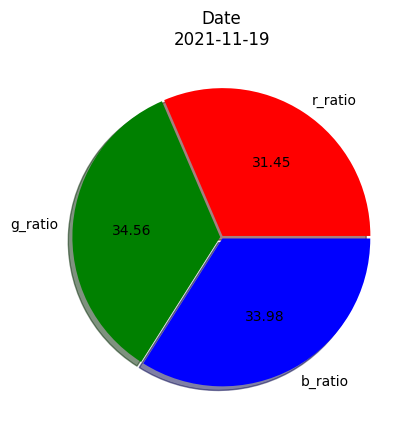

In [172]:
fig,ax = plt.subplots()
explode=[0.01,0.01,0.01] #pop out each slice from the pie
def getmepie(i):
    iv = min(i, len(iot_rgb.index)-1)
    # def absolute_value(val): #turn % back to a number
    #     a  = np.round(val/100.*df1.head(i).max().sum(), 0)
    #     return int(a)
    ax.clear()
    plot = iot_rgb.iloc[iv].plot.pie(y=iot_rgb.columns, autopct='%.2f', label='',explode = explode, colors=['r','g','b'], shadow = True)
    plot.set_title('Date\n' + str(iot_rgb.index[iv].strftime('%Y-%m-%d')), fontsize=12)

# import matplotlib.animation as ani
animator = animation.FuncAnimation(fig, getmepie, interval = 200)
# plt.show()
rc('animation', html='html5')
animator

## 와, Great!